<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/SN1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM


In [19]:
# Define a cosmology:
Om0 = 1.0
# this is LCDM: 

H0 = 70 # km/s/Mpc
cosmo0 = FlatLambdaCDM(Om0=Om0,H0=H0,name="$\Lambda$CDM")


# Pantheon data:

In [1]:
import pandas as pd
pan = pd.read_csv("https://raw.githubusercontent.com/dscolnic/Pantheon/master/lcparam_full_long.txt",delim_whitespace=True)
pan

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
0,03D1au,0.50309,0.50309,0.0,22.93445,0.12605,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,03D1ax,0.49480,0.49480,0.0,22.88020,0.11765,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,03D1co,0.67767,0.67767,0.0,24.03770,0.20560,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,03D1ew,0.86650,0.86650,0.0,24.34685,0.17385,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,03D1fq,0.79857,0.79857,0.0,24.36050,0.17435,0,0,0,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,Thoth,1.30500,1.30500,0.0,25.26420,0.23500,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1044,Vilas,0.93500,0.93500,0.0,24.26660,0.16580,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1045,SCP05D0,1.01400,1.01400,0.0,24.85445,0.22910,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1046,SCP05D6,1.31500,1.31500,0.0,25.54235,0.19870,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [2]:
# We only need columns: ['zsmb', 'mb', 'dmb']:
pan = pan.loc[:,['zcmb','mb','dmb']]
zz = pan['zcmb'].values
mb = pan['mb'].values
dmb = pan['dmb'].values

/usr/local/lib/python3.8/dist-packages/astropy/cosmology/core.py:1495: RuntimeWarning: divide by zero encountered in log10
  val = 5. * np.log10(abs(self.luminosity_distance(z).value)) + 25.0


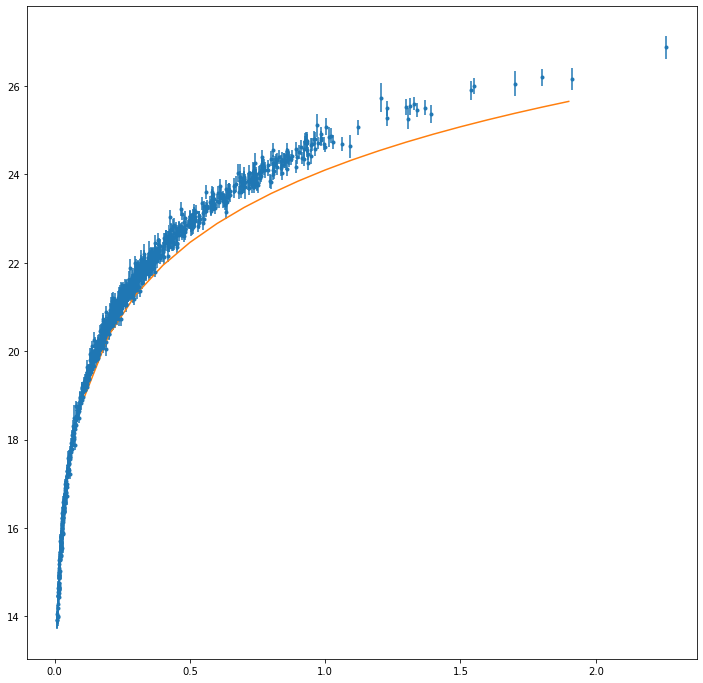

In [20]:
fig,ax = plt.subplots(1,figsize=(12,12))

zs=np.arange(0,2,0.1)

#ax.errorbar(zz, mb-cosmo0.distmod(zz).value,dmb,ls='',marker='.')
ax.errorbar(zz, mb,dmb,ls='',marker='.')
ax.plot(zs, cosmo0.distmod(zs).value-19.3,ls='-')
# we note that the residuals is around -19.3. This is because Pantheon reports m_B, not mu. 
# Let's add a constant 19.3 for now.: 